In [ ]:
import pandas as pd

In [59]:
pd.set_option('display.max_columns', 500)

In [60]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:

# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('./data/Alabama_2014.xlsx','Pt 1 Summary of Data',header = 2,index_col = 1)

In [62]:
df2 = pd.read_excel('./data/Alabama_2014.xlsx','Pt 2 Premium and Claims',header = 2,index_col = 1)
df3 = pd.read_excel('./data/Alabama_2014.xlsx','Pt 3 MLR and Rebate Calculation',header = 2,index_col = 1)


In [66]:
list(df.index)

['1. Premium',
 '1.1 Total direct premium earned',
 '1.2 Federal high risk pools',
 '1.3 State high risk pools',
 '1.4 Net assumed less ceded reinsurance premium earned (exclude amounts already reported in Line 1.1)',
 '1.5 Other adjustments due to MLR calculations - premium',
 '1.6 Risk revenue',
 '2. Claims',
 '2.1 Total incurred claims (MLR Form Part 2, Line 2.16)',
 '2.2 Prescription drugs (informational only; already included in total incurred claims above)',
 '2.3 Pharmaceutical rebates (informational only; already excluded from total incurred claims above)',
 '2.4 State stop loss, market stabilization and claim/census based assessments\n(informational only; already excluded from total incurred claims above)',
 '2.5 Net assumed less ceded claims incurred (exclude amounts already reported in Line 2.1)',
 '2.6 Other adjustments due to MLR calculations – claims incurred',
 '2.7 Rebates paid',
 '2.8 Estimated rebates unpaid at the end of the previous MLR reporting year',
 '2.9 Estima

In [173]:
import pandas as pd
import re

df = pd.read_excel('./data/Alabama_2014.xlsx','Pt 2 Premium and Claims',header = 2,index_col = 1)

def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    # Remove leading/trailing whitespace
    name = name.strip()
    # Replace newline characters with a space
    name = name.replace('\n', ' ')
    # Collapse multiple spaces into a single space
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

df_clean = clean_dataframe_names(df)



In [174]:
df_clean = clean_dataframe_names(df)




In [175]:
list(df_clean.index)

['1. Premium',
 '1.1 Direct premium written',
 '1.2 Unearned premium prior year',
 '1.3 Unearned premium MLR Reporting year',
 '1.4 Experience rating refunds (rate credits) paid',
 '1.4a Experience rating refunds, with all incurred dates, paid in the MLR reporting year',
 '1.4b Experience rating refunds associated with premium earned only in the reporting year and paid through 3/31 of the following year',
 '1.5 Reserve for experience rating refunds (rate credits) MLR Reporting year',
 '1.6 Reserve for experience rating refunds (rate credits) prior year',
 '1.7 Premium balances written off',
 '1.8 Group conversion charges',
 '1.9 Federal Transitional Reinsurance Program payments expected from HHS (as indicated by HHS as of 6/30)',
 '1.10 Federal Risk Adjustment Program net payments expected from HHS / (charges payable to HHS) (as indicated by HHS as of 6/30)',
 '1.11 Federal Risk Corridors Program net payments / (charges)',
 '1.12 Premium ceded under 100% reinsurance (informational only

In [176]:
df.head(20)

,Unnamed: 0,SHCE,1\nHealth Insurance\nINDIVIDUAL\nTotal as of 12/31/14,2\nHealth Insurance\nINDIVIDUAL\nTotal as of 3/31/15,3\nHealth Insurance\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),4\nHealth Insurance\nINDIVIDUAL\nDeferred PY1\n(Add),5\nHealth Insurance\nINDIVIDUAL\nDeferred CY\n(Subtract),2A\nHealth Insurance\nINDIVIDUAL\n[Risk Corridors]\nTotal as of 3/31/15,6\nHealth Insurance\nSMALL GROUP\nTotal as of 12/31/14,7\nHealth Insurance\nSMALL GROUP\nTotal as of 3/31/15,8\nHealth Insurance\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),9\nHealth Insurance\nSMALL GROUP\nDeferred PY1\n(Add),10\nHealth Insurance\nSMALL GROUP\nDeferred CY\n(Subtract),7A\nHealth Insurance\nSMALL GROUP\n[Risk Corridors]\nTotal as of 3/31/15,11\nHealth Insurance\nLARGE GROUP\nTotal as of 12/31/14,12\nHealth Insurance\nLARGE GROUP\nTotal as of 3/31/15,13\nHealth Insurance\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),14\nHealth Insurance\nLARGE GROUP\nDeferred PY1\n(Add),15\nHealth Insurance\nLARGE GROUP\nDeferred CY\n(Subtract),16\nMini-Med\nINDIVIDUAL\nTotal as of 12/31/14,17\nMini-Med\nINDIVIDUAL\nTotal as of 3/31/15,18\nMini-Med\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),19\nMini-Med\nSMALL GROUP\nTotal as of 12/31/14,20\nMini-Med\nSMALL GROUP\nTotal as of 3/31/15,21\nMini-Med\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),22\nMini-Med\nLARGE GROUP\nTotal as of 12/31/14,23\nMini-Med\nLARGE GROUP\nTotal as of 3/31/15,24\nMini-Med\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),25\nExpat\nSMALL GROUP\nTotal as of 12/31/14,26\nExpat\nSMALL GROUP\nTotal as of 3/31/15,27\nExpat\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),28\nExpat\nSMALL GROUP\nDeferred PY1\n(Add),29\nExpat\nSMALL GROUP\nDeferred CY\n(Subtract),30\nExpat\nLARGE GROUP\nTotal as of 12/31/14,31\nExpat\nLARGE GROUP\nTotal as of 3/31/15,32\nExpat\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),33\nExpat\nLARGE GROUP\nDeferred PY1\n(Add),34\nExpat\nLARGE GROUP\nDeferred CY\n(Subtract),35\nStudent Health\nINDIVIDUAL\nTotal as of 12/31/14,36\nStudent Health\nINDIVIDUAL\nTotal as of 3/31/15,37\nStudent Health\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),38\nStudent Health\nINDIVIDUAL\nDeferred PY1\n(Add),39\nStudent Health\nINDIVIDUAL\nDeferred CY\n(Subtract),40\nGovernment Program Plans \nTotal as of 12/31/14,41\nOther Health Business \nTotal as of 12/31/14,42\nAggregate 2% Rule\nTotal as of 12/31/14,43\nUninsured Plans\nTotal as of 12/31/14,44\nGrand Total\nTotal as of 12/31/14
Line Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1. Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1 Direct premium written,NaN,NaN,345271.28,345343.28,0.0,0.0,0.0,NaN,15690512.23,16240047.87,0.0,0.0,0.0,NaN,52061044.15,51473957.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74883188.96,66501329.67,0.0,NaN,NaN
1.2 Unearned premium prior year,NaN,"Pt 2, Ln 1.2",0.00,0.00,0.0,0.0,0.0,NaN,27294.83,7749.96,0.0,0.0,0.0,NaN,477.22,24534.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38328.03,0.0,NaN,NaN
1.3 Unearned premium MLR Reporting year,NaN,"Pt 2, Ln 1.3",0.00,0.00,0.0,0.0,0.0,NaN,24157.78,0.00,0.0,0.0,0.0,NaN,16795.35,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38940.94,0.0,NaN,NaN
1.4 Experience rating refunds (rate credits) paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1.4a Experience rating refunds, with all incurred dates, paid in t

In [161]:
df_clean.iloc[8,1:18]

1 Health Insurance Coverage INDIVIDUAL PY2        3.587924e+05
2 Health Insurance Coverage INDIVIDUAL PY1        2.305949e+05
3 Health Insurance Coverage INDIVIDUAL CY         2.154029e+05
4 Health Insurance Coverage INDIVIDUAL Total      8.047902e+05
4A Health Insurance Coverage INDIVIDUAL RC                 NaN
5 Health Insurance Coverage SMALL GROUP PY2       1.523079e+07
6 Health Insurance Coverage SMALL GROUP PY1       1.235324e+07
7 Health Insurance Coverage SMALL GROUP CY        1.118858e+07
8 Health Insurance Coverage SMALL GROUP Total     3.877260e+07
8A Health Insurance Coverage SMALL GROUP RC                NaN
9 Health Insurance Coverage LARGE GROUP PY2       5.428819e+07
10 Health Insurance Coverage LARGE GROUP PY1      5.426108e+07
11 Health Insurance Coverage LARGE GROUP CY       4.233114e+07
12 Health Insurance Coverage LARGE GROUP Total    1.508804e+08
13 Mini-Med Plans INDIVIDUAL PY2                           NaN
14 Mini-Med Plans INDIVIDUAL PY1                       

In [181]:
df_clean.iloc[1,3]

np.float64(345343.28)

In [184]:
df_clean.iloc[50,3]

np.float64(213507.56)

In [165]:
df_clean.iloc[8,9]

np.float64(38772602.58)

In [167]:
df_clean.iloc[8,14]

np.float64(150880411.13)

In [171]:
df_clean.iloc[13,4]

np.float64(1087022.15)

In [122]:
df_clean.iloc[11,14]

np.float64(179097234.97)

In [80]:
df_clean.loc['1.1 Total direct premium earned', '2 Health Insurance INDIVIDUAL Total as of 3/31/15']

np.float64(345343.28)

In [93]:
df_time

,year,individual,small_group,large_group
0,2014,345271.28,15690512.23,NaN
1,2015,288044.31,15341274.76,NaN
2,2016,198340.25,13795814.46,NaN
3,2017,171877.60,20403786.05,37027297.08
4,2018,58513.48,18195161.98,27711529.86
5,2019,2092.16,13331094.45,23979710.09
6,2020,40475.63,10944185.22,16847599.61
7,2021,20233.66,11361800.68,23380141.55
8,2022,58768430.65,11565821.97,58807562.64


Year 2014 processed successfully.
Year 2015 processed successfully.
Year 2016 processed successfully.


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Year 2017 processed successfully.
Year 2018 processed successfully.
Year 2019 processed successfully.
Year 2020 processed successfully.
Year 2021 processed successfully.

Time Series Data:
   year  individual  small_group  large_group
0  2014   345271.28  15690512.23          NaN
1  2015   288044.31  15341274.76          NaN
2  2016   198340.25  13795814.46          NaN
3  2017   171877.60  20403786.05  37027297.08
4  2018    58513.48  18195161.98  27711529.86
5  2019     2092.16  13331094.45  23979710.09
6  2020    40475.63  10944185.22  16847599.61
7  2021    20233.66  11361800.68  23380141.55


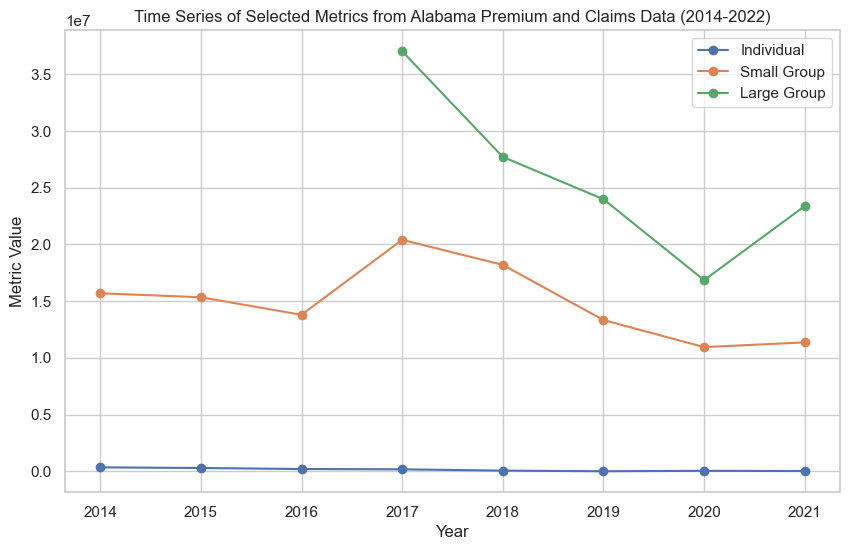

In [97]:
import pandas as pd
import re
import os
import glob
import matplotlib.pyplot as plt

# --- Cleaning Functions ---
def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    name = name.strip()
    name = name.replace('\n', ' ')
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

# --- Processing Multiple Files and Extracting Metrics ---
data_rows = []
# Assuming files are named "Alabama_2014.xlsx", "Alabama_2015.xlsx", ..., "Alabama_2022.xlsx"
for year in range(2014, 2022):
    filepath = f"./data/Alabama_{year}.xlsx"
    if not os.path.exists(filepath):
        print(f"File {filepath} not found. Skipping year {year}.")
        continue
    try:
        # Read the "Pt 2 Premium and Claims" sheet
        df = pd.read_excel(filepath, sheet_name="Pt 2 Premium and Claims", header=2, index_col=1)
        # Clean up column and row names
        df_clean = clean_dataframe_names(df)
        
        # Extract values by iloc:
        #   df_clean.iloc[1,2] corresponds to "2 Health Insurance INDIVIDUAL Total as of 3/31/15"
        #   df_clean.iloc[1,8] corresponds to "7 Health Insurance SMALL GROUP Total as of 3/31/15"
        #   df_clean.iloc[1,13] corresponds to "12 Health Insurance LARGE GROUP Total as of 3/31/15"
        indiv_val = df_clean.iloc[1, 2]
        small_group_val = df_clean.iloc[1, 8]
        large_group_val = df_clean.iloc[1, 13]
        
        data_rows.append({
            'year': year,
            'individual': indiv_val,
            'small_group': small_group_val,
            'large_group': large_group_val
        })
        print(f"Year {year} processed successfully.")
    except Exception as e:
        print(f"Error processing file for year {year}: {e}")

# Build a time series DataFrame
df_time = pd.DataFrame(data_rows)
df_time = df_time.sort_values('year').reset_index(drop=True)
print("\nTime Series Data:")
print(df_time)

# --- Plotting the Time Series ---
plt.figure(figsize=(10, 6))
plt.plot(df_time['year'], df_time['individual'], marker='o', label='Individual')
plt.plot(df_time['year'], df_time['small_group'], marker='o', label='Small Group')
plt.plot(df_time['year'], df_time['large_group'], marker='o', label='Large Group')
plt.xlabel('Year')
plt.ylabel('Metric Value')
plt.title('Time Series of Selected Metrics from Alabama Premium and Claims Data (2014-2022)')
plt.legend()
plt.grid(True)
plt.show()


Processed ./data/Alabama_2014.xlsx: 1236438.83, 51682964.17, 179097234.97
Processed ./data/Alabama_2015.xlsx: 1036617.19, 48405885.47, 149425171.23
Processed ./data/Alabama_2016.xlsx: 845993.96, 45911701.4, 130455271.6
Processed ./data/Alabama_2017.xlsx: 684711.76, 34281318.9, 0.0


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


Processed ./data/Alabama_2018.xlsx: 509166.77, 44744437.58, 0.0
Processed ./data/Alabama_2019.xlsx: 291228.82, 36998662.01, 0.0
Processed ./data/Alabama_2020.xlsx: 200952.55, 27612928.32, 0.0
Processed ./data/Alabama_2021.xlsx: 126422.67, 23931288.71, 0.0
Processed ./data/Alabama_2022.xlsx: 66088638.72, 16807978.91, 0.0

Time Series Data:
          Metric1      Metric2       Metric3
Year                                        
2014   1236438.83  51682964.17  1.790972e+08
2015   1036617.19  48405885.47  1.494252e+08
2016    845993.96  45911701.40  1.304553e+08
2017    684711.76  34281318.90  0.000000e+00
2018    509166.77  44744437.58  0.000000e+00
2019    291228.82  36998662.01  0.000000e+00
2020    200952.55  27612928.32  0.000000e+00
2021    126422.67  23931288.71  0.000000e+00
2022  66088638.72  16807978.91  0.000000e+00


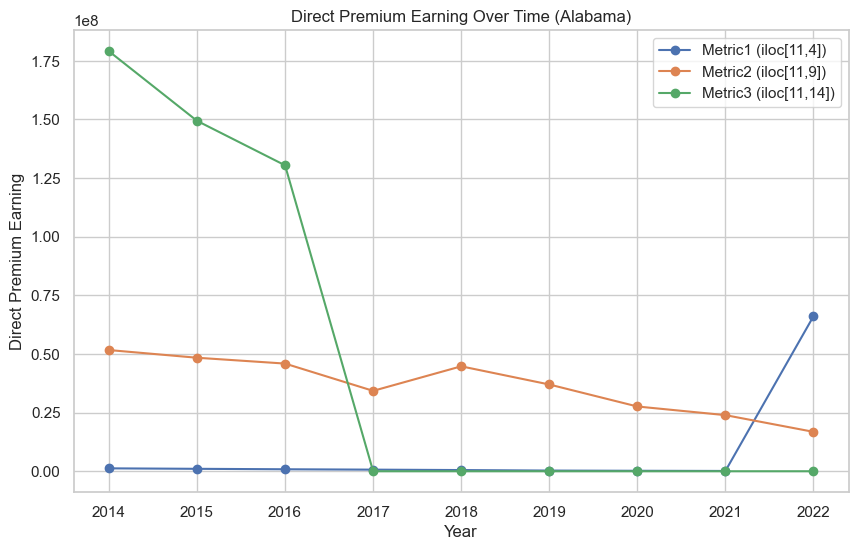

In [124]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# --- Your existing cleaning functions ---
def clean_name(name):
    """
    Cleans a single string by:
    - Converting to string (if not already)
    - Stripping leading/trailing whitespace
    - Replacing newline characters with a space
    - Collapsing multiple spaces into one
    """
    if not isinstance(name, str):
        name = str(name)
    # Remove leading/trailing whitespace
    name = name.strip()
    # Replace newline characters with a space
    name = name.replace('\n', ' ')
    # Collapse multiple spaces into a single space
    name = re.sub(r'\s+', ' ', name)
    return name

def clean_dataframe_names(df):
    """
    Returns a copy of the DataFrame with cleaned column and index names.
    """
    df = df.copy()
    df.columns = [clean_name(col) for col in df.columns]
    df.index = [clean_name(idx) for idx in df.index]
    return df

# --- Loop over files from 2014 to 2022 ---
years = range(2014, 2023)  # 2014 to 2022 inclusive
data_list = []

for year in years:
    filename = f'./data/Alabama_{year}.xlsx'
    try:
        # Read the sheet "Pt 2 Premium and Claims" with header from the 3rd row (header=2)
        df = pd.read_excel(filename, sheet_name="Pt 3 MLR and Rebate Calculation", header=2, index_col=1)
        df_clean = clean_dataframe_names(df)
        
        # Extract the three metrics using iloc:
        #   - df_clean.iloc[11, 4]
        #   - df_clean.iloc[11, 9]
        #   - df_clean.iloc[11, 14]
        val1 = df_clean.iloc[11, 4]
        val2 = df_clean.iloc[11, 9]
        val3 = df_clean.iloc[11, 14]
        
        # Convert to numeric (if necessary); if conversion fails, result will be NaN.
        val1 = pd.to_numeric(val1, errors='coerce')
        val2 = pd.to_numeric(val2, errors='coerce')
        val3 = pd.to_numeric(val3, errors='coerce')
        
        # Append to our list of data with the year and the three metric values.
        data_list.append({
            'Year': year,
            'Metric1': val1,
            'Metric2': val2,
            'Metric3': val3
        })
        print(f"Processed {filename}: {val1}, {val2}, {val3}")
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        continue

# Create a time series DataFrame from our list
df_ts = pd.DataFrame(data_list)
df_ts.set_index('Year', inplace=True)
print("\nTime Series Data:")
print(df_ts)

# --- Plotting the time series ---
plt.figure(figsize=(10, 6))
plt.plot(df_ts.index, df_ts['Metric1'], marker='o', label='Metric1 (iloc[11,4])')
plt.plot(df_ts.index, df_ts['Metric2'], marker='o', label='Metric2 (iloc[11,9])')
plt.plot(df_ts.index, df_ts['Metric3'], marker='o', label='Metric3 (iloc[11,14])')
plt.xlabel('Year')
plt.ylabel('Direct Premium Earning')
plt.title('Direct Premium Earning Over Time (Alabama)')
plt.legend()
plt.grid(True)
plt.show()


In [172]:
import pandas as pd

# Range goes up to (but does not include) the second argument
years = range(2014, 2023)

# We'll collect results in a list of dictionaries, then convert to DataFrame
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read Excel: "Pt 3 MLR and Rebate Calculation" sheet, header=2, index_col=1
    df = pd.read_excel(
        file_name,
        'Pt 3 MLR and Rebate Calculation',
        header=2,
        index_col=1
    )
    
    # Numerators
    numerator_individual   = df.iloc[8,  4]
    numerator_small_group  = df.iloc[8,  9]
    numerator_large_group  = df.iloc[8, 14]
    
    # Denominators
    denominator_individual  = df.iloc[13, 4]
    denominator_small_group = df.iloc[13, 9]
    denominator_large_group = df.iloc[13, 14]  # If your data truly has large group in col 9 as well,
                                               # you can match that. This assumes col 14 is correct.
    
    # Calculate MLR values (handle division by zero safely)
    mlr_ind = (numerator_individual / denominator_individual 
               if denominator_individual else None)
    mlr_sm  = (numerator_small_group / denominator_small_group 
               if denominator_small_group else None)
    mlr_lg  = (numerator_large_group / denominator_large_group 
               if denominator_large_group else None)
    
    # Store each year’s results in a dictionary
    results.append({
        'Year': year,
        'MLR_Individual': mlr_ind,
        'MLR_Small_Group': mlr_sm,
        'MLR_Large_Group': mlr_lg
    })

# Convert list of dicts to a DataFrame for easy display / export
results_df = pd.DataFrame(results)

print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  MLR_Individual  MLR_Small_Group  MLR_Large_Group
0  2014        0.740362         0.813576         0.885101
1  2015        0.718050         0.788001         0.880973
2  2016        0.878374         0.790627         0.904454
3  2017        0.896710         0.898138              NaN
4  2018        1.028013         0.941499              NaN
5  2019        0.815252         0.863313              NaN
6  2020        0.000000         0.000000              NaN
7  2021        0.000000         0.000000              NaN
8  2022        0.000000         0.000000              NaN


In [192]:
    df = pd.read_excel(
        './data/Alabama_2014.xlsx',
        sheet_name='Pt 2 Premium and Claims',
        header=2,       # or whatever row in your Excel is actually the header
        index_col=1  # or index_col=0 if your first column is row labels
    )

In [193]:
df

,Unnamed: 0,SHCE,1\nHealth Insurance\nINDIVIDUAL\nTotal as of 12/31/14,2\nHealth Insurance\nINDIVIDUAL\nTotal as of 3/31/15,3\nHealth Insurance\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),4\nHealth Insurance\nINDIVIDUAL\nDeferred PY1\n(Add),5\nHealth Insurance\nINDIVIDUAL\nDeferred CY\n(Subtract),2A\nHealth Insurance\nINDIVIDUAL\n[Risk Corridors]\nTotal as of 3/31/15,6\nHealth Insurance\nSMALL GROUP\nTotal as of 12/31/14,7\nHealth Insurance\nSMALL GROUP\nTotal as of 3/31/15,8\nHealth Insurance\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),9\nHealth Insurance\nSMALL GROUP\nDeferred PY1\n(Add),10\nHealth Insurance\nSMALL GROUP\nDeferred CY\n(Subtract),7A\nHealth Insurance\nSMALL GROUP\n[Risk Corridors]\nTotal as of 3/31/15,11\nHealth Insurance\nLARGE GROUP\nTotal as of 12/31/14,12\nHealth Insurance\nLARGE GROUP\nTotal as of 3/31/15,13\nHealth Insurance\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),14\nHealth Insurance\nLARGE GROUP\nDeferred PY1\n(Add),15\nHealth Insurance\nLARGE GROUP\nDeferred CY\n(Subtract),16\nMini-Med\nINDIVIDUAL\nTotal as of 12/31/14,17\nMini-Med\nINDIVIDUAL\nTotal as of 3/31/15,18\nMini-Med\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),19\nMini-Med\nSMALL GROUP\nTotal as of 12/31/14,20\nMini-Med\nSMALL GROUP\nTotal as of 3/31/15,21\nMini-Med\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),22\nMini-Med\nLARGE GROUP\nTotal as of 12/31/14,23\nMini-Med\nLARGE GROUP\nTotal as of 3/31/15,24\nMini-Med\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),25\nExpat\nSMALL GROUP\nTotal as of 12/31/14,26\nExpat\nSMALL GROUP\nTotal as of 3/31/15,27\nExpat\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/15),28\nExpat\nSMALL GROUP\nDeferred PY1\n(Add),29\nExpat\nSMALL GROUP\nDeferred CY\n(Subtract),30\nExpat\nLARGE GROUP\nTotal as of 12/31/14,31\nExpat\nLARGE GROUP\nTotal as of 3/31/15,32\nExpat\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/15),33\nExpat\nLARGE GROUP\nDeferred PY1\n(Add),34\nExpat\nLARGE GROUP\nDeferred CY\n(Subtract),35\nStudent Health\nINDIVIDUAL\nTotal as of 12/31/14,36\nStudent Health\nINDIVIDUAL\nTotal as of 3/31/15,37\nStudent Health\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/15),38\nStudent Health\nINDIVIDUAL\nDeferred PY1\n(Add),39\nStudent Health\nINDIVIDUAL\nDeferred CY\n(Subtract),40\nGovernment Program Plans \nTotal as of 12/31/14,41\nOther Health Business \nTotal as of 12/31/14,42\nAggregate 2% Rule\nTotal as of 12/31/14,43\nUninsured Plans\nTotal as of 12/31/14,44\nGrand Total\nTotal as of 12/31/14
Line Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1. Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1 Direct premium written,NaN,NaN,345271.28,345343.28,0.0,0.0,0.0,NaN,15690512.23,16240047.87,0.0,0.0,0.0,NaN,52061044.15,51473957.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74883188.96,66501329.67,0.0,NaN,NaN
1.2 Unearned premium prior year,NaN,"Pt 2, Ln 1.2",0.00,0.00,0.0,0.0,0.0,NaN,27294.83,7749.96,0.0,0.0,0.0,NaN,477.22,24534.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38328.03,0.0,NaN,NaN
1.3 Unearned premium MLR Reporting year,NaN,"Pt 2, Ln 1.3",0.00,0.00,0.0,0.0,0.0,NaN,24157.78,0.00,0.0,0.0,0.0,NaN,16795.35,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,38940.94,0.0,NaN,NaN
1.4 Experience rating refunds (rate credits) paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1.4a Experience rating refunds, with all incurred dates, paid in t

In [194]:
import pandas as pd

# Years from 2014 to 2022 (range end is exclusive, so 2023 is not included)
years = range(2014, 2023)

# Collect results in a list of dictionaries
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read Excel
    # If your row with column headers is different, adjust 'header=' accordingly
    # Also, if you have row labels you want as an index, you could set index_col=...
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,       # or whatever row in your Excel is actually the header
        index_col=1  # or index_col=0 if your first column is row labels
    )
    
    # -- Individual Coverage --
    premium_individual      = df.iloc[1, 3]   # df_clean.iloc[1,3] from your note
    incurred_individual     = df.iloc[50, 3]  # df_clean.iloc[50,3]
    ratio_individual        = (incurred_individual / premium_individual 
                              if premium_individual else None)
    
    # -- Small Group Coverage --
    # Assuming same rows, but offset columns
    premium_small_group     = df.iloc[1, 8]
    incurred_small_group    = df.iloc[50, 8]
    ratio_small_group       = (incurred_small_group / premium_small_group 
                              if premium_small_group else None)
    
    # -- Large Group Coverage --
    premium_large_group     = df.iloc[1, 13]
    incurred_large_group    = df.iloc[50, 13]
    ratio_large_group       = (incurred_large_group / premium_large_group 
                              if premium_large_group else None)
    
    # Store each year’s results in a dictionary
    results.append({
        'Year': year,
        'Premium_Ind': premium_individual,
        'Incurred_Ind': incurred_individual,
        'Claims/Prem_Individual': ratio_individual,
        
        'Premium_SG': premium_small_group,
        'Incurred_SG': incurred_small_group,
        'Claims/Prem_SmallGroup': ratio_small_group,
        
        'Premium_LG': premium_large_group,
        'Incurred_LG': incurred_large_group,
        'Claims/Prem_LargeGroup': ratio_large_group,
    })

# Convert list of dicts to a DataFrame
results_df = pd.DataFrame(results)

print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Incurred_Ind  Claims/Prem_Individual   Premium_SG  \
0  2014    345343.28     213507.56                0.618247  15690512.23   
1  2015    283446.31     172189.06                0.607484  15341274.76   
2  2016    218499.87     182329.89                0.834462  13795814.46   
3  2017    183781.62     106443.89                0.579187  20403786.05   
4  2018    107686.99      66154.47                0.614322  18195161.98   
5  2019     65713.38          0.00                0.000000  13331094.45   
6  2020     42000.86          0.00                0.000000  10944185.22   
7  2021     18708.43          0.00                0.000000  11361800.68   
8  2022  66027929.43          0.00                0.000000  11565821.97   

   Incurred_SG  Claims/Prem_SmallGroup   Premium_LG  Incurred_LG  \
0  11014800.44                0.702004          NaN          NaN   
1   9725207.75                0.633924          NaN          NaN   
2  10753361.02                0.779465       

In [195]:
results_df

,Year,Premium_Ind,Incurred_Ind,Claims/Prem_Individual,Premium_SG,Incurred_SG,Claims/Prem_SmallGroup,Premium_LG,Incurred_LG,Claims/Prem_LargeGroup
0,2014,345343.28,213507.56,0.618247,15690512.23,11014800.44,0.702004,NaN,NaN,NaN
1,2015,283446.31,172189.06,0.607484,15341274.76,9725207.75,0.633924,NaN,NaN,NaN
2,2016,218499.87,182329.89,0.834462,13795814.46,10753361.02,0.779465,NaN,NaN,NaN
3,2017,183781.62,106443.89,0.579187,20403786.05,16394847.68,0.803520,37027297.08,30621338.76,0.826994
4,2018,107686.99,66154.47,0.614322,18195161.98,12163606.64,0.668508,27711529.86,21054941.95,0.759790
5,2019,65713.38,0.00,0.000000,13331094.45,0.00,0.000000,23979710.09,0.00,0.000000
6,2020,42000.86,0.00,0.000000,10944185.22,0.00,0.000000,16847599.61,0.00,0.000000
7,2021,18708.43,0.00,0.000000,11361800.68,0.00,0.000000,23380141.55,0.00,0.000000
8,2022,66027929.43,0.00,0.000000,11565821.97,0.00,0.000000,58807562.64,0.00,0.000000


In [197]:
df

,Unnamed: 0,1\nHealth Insurance Coverage\nINDIVIDUAL\nPY2,2\nHealth Insurance Coverage\nINDIVIDUAL\nPY1,3\nHealth Insurance Coverage\nINDIVIDUAL\nCY,4\nHealth Insurance Coverage\nINDIVIDUAL\nTotal,5\nHealth Insurance Coverage\nSMALL GROUP\nPY2,6\nHealth Insurance Coverage\nSMALL GROUP\nPY1,7\nHealth Insurance Coverage\nSMALL GROUP\nCY,8\nHealth Insurance Coverage\nSMALL GROUP\nTotal,9\nHealth Insurance Coverage\nLARGE GROUP\nPY2,10\nHealth Insurance Coverage\nLARGE GROUP\nPY1,11\nHealth Insurance Coverage\nLARGE GROUP\nCY,12\nHealth Insurance Coverage\nLARGE GROUP\nTotal,13\nMini-Med Plans\nINDIVIDUAL\nPY2,14\nMini-Med Plans\nINDIVIDUAL\nPY1,15\nMini-Med Plans\nINDIVIDUAL\nCY,16\nMini-Med Plans\nINDIVIDUAL\nTotal,17\nMini-Med Plans\nSMALL GROUP\nPY2,18\nMini-Med Plans\nSMALL GROUP\nPY1,19\nMini-Med Plans\nSMALL GROUP\nCY,20\nMini-Med Plans\nSMALL GROUP\nTotal,21\nMini-Med Plans\nLARGE GROUP\nPY2,22\nMini-Med Plans\nLARGE GROUP\nPY1,23\nMini-Med Plans\nLARGE GROUP\nCY,24\nMini-Med Plans\nLARGE GROUP\nTotal,25\nExpatriate Plans\nSMALL GROUP\nPY2,26\nExpatriate Plans\nSMALL GROUP\nPY1,27\nExpatriate Plans\nSMALL GROUP\nCY,28\nExpatriate Plans\nSMALL GROUP\nTotal,29\nExpatriate Plans\nLARGE GROUP\nPY2,30\nExpatriate Plans\nLARGE GROUP\nPY1,31\nExpatriate Plans\nLARGE GROUP\nCY,32\nExpatriate Plans\nLARGE GROUP\nTotal,33\nStudent Health Plans\nINDIVIDUAL\nPY2,34\nStudent Health Plans\nINDIVIDUAL\nPY1,35\nStudent Health Plans\nINDIVIDUAL\nCY,36\nStudent Health Plans\nINDIVIDUAL\nTotal
Line Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1. Medical Loss Ratio Numerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1 Adjusted incurred claims as reported on MLR Form for prior year(s),ADJ_INCURRED_CLAIMS,29013.930000,12696.420000,NaN,NaN,1.219715e+07,9.332403e+06,NaN,NaN,1.444181e+07,2.168138e+07,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2 Adjusted incurred claims as of 3/31 of the year following the MLR reporting year,ADJ_INCURRED_CLAIMS_RESTATED_Q1,25957.970000,39837.730000,3.019035e+07,3.025615e+07,1.194542e+07,9.382052e+06,8.971286e+06,3.029875e+07,1.451650e+07,2.178719e+07,5.278425e+07,8.908794e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.3 Improving Health Care Quality Expenses,QUALITY_IMPROVEMENT_EXPENSES,158.900000,89.660000,2.895944e+05,2.898430e+05,1.084319e+05,6.578437e+04,5.164532e+04,2.258616e+05,1.984314e+05,1.523460e+05,3.224546e+05,6.732320e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.4 Reconciled payments of cost-sharing reductions,ADVANCE_PAYMENTS_CSR,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.5 Federal Transitional Reinsurance Program payments from HHS,FED_REINS_PAYMENTS_HHS,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.6 Federal Risk Adjustment Program net payments expected from HHS / (charges payable to HHS) (as indicated by HHS as of 6/30),FED_RISK_ADJ_NET_PAYMENTS_HHS,0.000000,0.000000,-6.991486e+06,-6.991486e+06,1.168164e+06,-4.506291e+05,2.824647e+05,9.999993e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.7 Reserved,FED_RISK_CORR_NET_PAYMENTS_HHS,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.8 Shared Savings payments to enrollees,SHARED_SAVINGS,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0

In [209]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Returns the division of numerator by denominator.
    If denominator is zero or either value is NaN, returns np.nan.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    # Read the Excel sheet using row 2 as header and first column as index.
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings (handling NaNs or non-string entries)
    df.index = df.index.fillna("").astype(str)
    
    # Find the row where the index contains "total incurred claims" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("total incurred claims")]
    
    if len(row_matches) == 0:
        # If no match is found, assign NaN values.
        incurred_individual = np.nan
        incurred_small_group = np.nan
        incurred_large_group = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Retrieve incurred claim values for each market segment (adjust column indices if needed)
        incurred_individual = df.iloc[row_idx, 3]
        incurred_small_group = df.iloc[row_idx, 8]
        incurred_large_group = df.iloc[row_idx, 13]
    
    # Retrieve premium values from row 1 for each market segment
    premium_individual = df.iloc[1, 3]
    premium_small_group = df.iloc[1, 8]
    premium_large_group = df.iloc[1, 13]
    
    # Compute ratios safely
    ratio_individual = safe_divide(incurred_individual, premium_individual)
    ratio_small_group = safe_divide(incurred_small_group, premium_small_group)
    ratio_large_group = safe_divide(incurred_large_group, premium_large_group)
    
    # Append the results for this year
    results.append({
        'Year': year,
        'Premium_Ind': premium_individual,
        'Incurred_Ind': incurred_individual,
        'Claims/Prem_Individual': ratio_individual,
        'Premium_SG': premium_small_group,
        'Incurred_SG': incurred_small_group,
        'Claims/Prem_SmallGroup': ratio_small_group,
        'Premium_LG': premium_large_group,
        'Incurred_LG': incurred_large_group,
        'Claims/Prem_LargeGroup': ratio_large_group
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Incurred_Ind  Claims/Prem_Individual   Premium_SG  \
0  2014    345343.28     213507.56                0.618247  15690512.23   
1  2015    283446.31     172189.06                0.607484  15341274.76   
2  2016    218499.87     182329.89                0.834462  13795814.46   
3  2017    183781.62     106443.89                0.579187  20403786.05   
4  2018    107686.99      66154.47                0.614322  18195161.98   
5  2019     65713.38      46308.75                0.704708  13331094.45   
6  2020     42000.86      29013.93                0.690794  10944185.22   
7  2021     18708.43      12696.42                0.678647  11361800.68   
8  2022  66027929.43   30190354.12                0.457236  11565821.97   

   Incurred_SG  Claims/Prem_SmallGroup   Premium_LG  Incurred_LG  \
0  11014800.44                0.702004          NaN          NaN   
1   9725207.75                0.633924          NaN          NaN   
2  10753361.02                0.779465       

In [210]:
df

,Unnamed: 0,SHCE,1\nHealth Insurance\nINDIVIDUAL\nTotal as of 12/31/22,2\nHealth Insurance\nINDIVIDUAL\nTotal as of 3/31/23,3\nHealth Insurance\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),4\nHealth Insurance\nINDIVIDUAL\nDeferred PY1\n(Add),5\nHealth Insurance\nINDIVIDUAL\nDeferred CY\n(Subtract),6\nHealth Insurance\nSMALL GROUP\nTotal as of 12/31/22,7\nHealth Insurance\nSMALL GROUP\nTotal as of 3/31/23,8\nHealth Insurance\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),9\nHealth Insurance\nSMALL GROUP\nDeferred PY1\n(Add),10\nHealth Insurance\nSMALL GROUP\nDeferred CY\n(Subtract),11\nHealth Insurance\nLARGE GROUP\nTotal as of 12/31/22,12\nHealth Insurance\nLARGE GROUP\nTotal as of 3/31/23,13\nHealth Insurance\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),14\nHealth Insurance\nLARGE GROUP\nDeferred PY1\n(Add),15\nHealth Insurance\nLARGE GROUP\nDeferred CY\n(Subtract),16\nMini-Med\nINDIVIDUAL\nTotal as of 12/31/22,17\nMini-Med\nINDIVIDUAL\nTotal as of 3/31/23,18\nMini-Med\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),19\nMini-Med\nSMALL GROUP\nTotal as of 12/31/22,20\nMini-Med\nSMALL GROUP\nTotal as of 3/31/23,21\nMini-Med\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),22\nMini-Med\nLARGE GROUP\nTotal as of 12/31/22,23\nMini-Med\nLARGE GROUP\nTotal as of 3/31/23,24\nMini-Med\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),25\nExpat\nSMALL GROUP\nTotal as of 12/31/22,26\nExpat\nSMALL GROUP\nTotal as of 3/31/23,27\nExpat\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),28\nExpat\nSMALL GROUP\nDeferred PY1\n(Add),29\nExpat\nSMALL GROUP\nDeferred CY\n(Subtract),30\nExpat\nLARGE GROUP\nTotal as of 12/31/22,31\nExpat\nLARGE GROUP\nTotal as of 3/31/23,32\nExpat\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),33\nExpat\nLARGE GROUP\nDeferred PY1\n(Add),34\nExpat\nLARGE GROUP\nDeferred CY\n(Subtract),35\nStudent Health\nINDIVIDUAL\nTotal as of 12/31/22,36\nStudent Health\nINDIVIDUAL\nTotal as of 3/31/23,37\nStudent Health\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),38\nStudent Health\nINDIVIDUAL\nDeferred PY1\n(Add),39\nStudent Health\nINDIVIDUAL\nDeferred CY\n(Subtract),40\nGovernment Program Plans \nTotal as of 12/31/22,41\nOther Health Business \nTotal as of 12/31/22,42\nMedicare MLR Business\nTotal as of 12/31/22,43\nUninsured Plans\nTotal as of 12/31/22,44\nGrand Total\nTotal as of 12/31/22
Line Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1. Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1 Direct premium written,DIRECT_PREMIUM_WRITTEN,NaN,58768430.65,66027929.43,0.0,0.0,0.0,10904319.48,11565821.97,0.0,0.0,0.0,58856007.53,58807562.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.751031e+07,35223952.11,NaN,NaN
1.2 Unearned premium prior year,UNEARNED_PREMIUM_PRIOR_YEAR,"Pt 2, Ln 1.2",0.00,0.00,0.0,0.0,0.0,4484.34,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.529136e+04,0.00,NaN,NaN
1.3 Unearned premium MLR Reporting year,UNEARNED_PREMIUM_CURRENT_YEAR,"Pt 2, Ln 1.3",0.00,0.00,0.0,0.0,0.0,3.13,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-9.064793e+04,0.00,NaN,NaN
1.4 Experience rating refunds (rate credits) paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1.4a Experience rating refunds, with all incurred dates, paid in the MLR reporting year",EXP_RATING_REFUNDS_PAID_REP_YR,"Pt 2, Ln 1.5",-454.99,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00

In [228]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Safely divides numerator by denominator.
    Returns np.nan if denominator is zero, or if either value is NaN.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings so we can search it
    df.index = df.index.fillna("").astype(str)
    
    # Find the row that contains "claims paid" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("claims paid during")]
    
    if len(row_matches) == 0:
        # No match found: set claims paid values as NaN
        claims_paid_ind = np.nan
        claims_paid_sg = np.nan
        claims_paid_lg = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Adjust these column indices based on your layout
        claims_paid_ind = df.iloc[row_idx, 2]
        claims_paid_sg = df.iloc[row_idx, 7]
        claims_paid_lg = df.iloc[row_idx, 12]
    
    # Premium values from row 1 (for example)
    premium_ind = df.iloc[1, 2]
    premium_sg = df.iloc[1, 7]
    premium_lg = df.iloc[1, 12]
    
    # Calculate the paid loss ratios safely
    paid_loss_ratio_ind = safe_divide(claims_paid_ind, premium_ind)
    paid_loss_ratio_sg = safe_divide(claims_paid_sg, premium_sg)
    paid_loss_ratio_lg = safe_divide(claims_paid_lg, premium_lg)
    
    results.append({
        'Year': year,
        'Premium_Ind': premium_ind,
        'ClaimsPaid_Ind': claims_paid_ind,
        'PaidLossRatio_Ind': paid_loss_ratio_ind,
        'Premium_SG': premium_sg,
        'ClaimsPaid_SG': claims_paid_sg,
        'PaidLossRatio_SG': paid_loss_ratio_sg,
        'Premium_LG': premium_lg,
        'ClaimsPaid_LG': claims_paid_lg,
        'PaidLossRatio_LG': paid_loss_ratio_lg
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  ClaimsPaid_Ind  PaidLossRatio_Ind   Premium_SG  \
0  2014    345271.28       204789.55           0.593127          NaN   
1  2015    288044.31       452515.39           1.570992          NaN   
2  2016    198340.25       670862.98           3.382384          NaN   
3  2017    171877.60        82397.20           0.479395  20833475.41   
4  2018     58513.48        94800.33           1.620145  17096412.39   
5  2019      2092.16        36325.89          17.362864  14001496.47   
6  2020     40475.63       164263.06           4.058320  11913180.54   
7  2021     20233.66       -14363.48          -0.709880  11439489.89   
8  2022  58768430.65     25369137.02           0.431680  10904319.48   

   ClaimsPaid_SG  PaidLossRatio_SG   Premium_LG  ClaimsPaid_LG  \
0            NaN               NaN         0.00            NaN   
1            NaN               NaN         0.00            NaN   
2            NaN               NaN         0.00            NaN   
3    16373353.1

In [227]:
df

,Unnamed: 0,SHCE,1\nHealth Insurance\nINDIVIDUAL\nTotal as of 12/31/22,2\nHealth Insurance\nINDIVIDUAL\nTotal as of 3/31/23,3\nHealth Insurance\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),4\nHealth Insurance\nINDIVIDUAL\nDeferred PY1\n(Add),5\nHealth Insurance\nINDIVIDUAL\nDeferred CY\n(Subtract),6\nHealth Insurance\nSMALL GROUP\nTotal as of 12/31/22,7\nHealth Insurance\nSMALL GROUP\nTotal as of 3/31/23,8\nHealth Insurance\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),9\nHealth Insurance\nSMALL GROUP\nDeferred PY1\n(Add),10\nHealth Insurance\nSMALL GROUP\nDeferred CY\n(Subtract),11\nHealth Insurance\nLARGE GROUP\nTotal as of 12/31/22,12\nHealth Insurance\nLARGE GROUP\nTotal as of 3/31/23,13\nHealth Insurance\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),14\nHealth Insurance\nLARGE GROUP\nDeferred PY1\n(Add),15\nHealth Insurance\nLARGE GROUP\nDeferred CY\n(Subtract),16\nMini-Med\nINDIVIDUAL\nTotal as of 12/31/22,17\nMini-Med\nINDIVIDUAL\nTotal as of 3/31/23,18\nMini-Med\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),19\nMini-Med\nSMALL GROUP\nTotal as of 12/31/22,20\nMini-Med\nSMALL GROUP\nTotal as of 3/31/23,21\nMini-Med\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),22\nMini-Med\nLARGE GROUP\nTotal as of 12/31/22,23\nMini-Med\nLARGE GROUP\nTotal as of 3/31/23,24\nMini-Med\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),25\nExpat\nSMALL GROUP\nTotal as of 12/31/22,26\nExpat\nSMALL GROUP\nTotal as of 3/31/23,27\nExpat\nSMALL GROUP\nDual Contracts\n(Included in Total as of 3/31/23),28\nExpat\nSMALL GROUP\nDeferred PY1\n(Add),29\nExpat\nSMALL GROUP\nDeferred CY\n(Subtract),30\nExpat\nLARGE GROUP\nTotal as of 12/31/22,31\nExpat\nLARGE GROUP\nTotal as of 3/31/23,32\nExpat\nLARGE GROUP\nDual Contracts\n(Included in Total as of 3/31/23),33\nExpat\nLARGE GROUP\nDeferred PY1\n(Add),34\nExpat\nLARGE GROUP\nDeferred CY\n(Subtract),35\nStudent Health\nINDIVIDUAL\nTotal as of 12/31/22,36\nStudent Health\nINDIVIDUAL\nTotal as of 3/31/23,37\nStudent Health\nINDIVIDUAL\nDual Contracts\n(Included in Total as of 3/31/23),38\nStudent Health\nINDIVIDUAL\nDeferred PY1\n(Add),39\nStudent Health\nINDIVIDUAL\nDeferred CY\n(Subtract),40\nGovernment Program Plans \nTotal as of 12/31/22,41\nOther Health Business \nTotal as of 12/31/22,42\nMedicare MLR Business\nTotal as of 12/31/22,43\nUninsured Plans\nTotal as of 12/31/22,44\nGrand Total\nTotal as of 12/31/22
Line Description,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1. Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.1 Direct premium written,DIRECT_PREMIUM_WRITTEN,NaN,58768430.65,66027929.43,0.0,0.0,0.0,10904319.48,11565821.97,0.0,0.0,0.0,58856007.53,58807562.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9.751031e+07,35223952.11,NaN,NaN
1.2 Unearned premium prior year,UNEARNED_PREMIUM_PRIOR_YEAR,"Pt 2, Ln 1.2",0.00,0.00,0.0,0.0,0.0,4484.34,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.529136e+04,0.00,NaN,NaN
1.3 Unearned premium MLR Reporting year,UNEARNED_PREMIUM_CURRENT_YEAR,"Pt 2, Ln 1.3",0.00,0.00,0.0,0.0,0.0,3.13,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-9.064793e+04,0.00,NaN,NaN
1.4 Experience rating refunds (rate credits) paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"1.4a Experience rating refunds, with all incurred dates, paid in the MLR reporting year",EXP_RATING_REFUNDS_PAID_REP_YR,"Pt 2, Ln 1.5",-454.99,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00

In [229]:
import pandas as pd
import numpy as np

def safe_divide(numerator, denominator):
    """
    Safely divides numerator by denominator.
    Returns np.nan if denominator is zero, or if either value is NaN.
    """
    try:
        if pd.isnull(numerator) or pd.isnull(denominator) or denominator == 0:
            return np.nan
        return numerator / denominator
    except Exception:
        return np.nan

years = range(2014, 2023)
results = []

for year in years:
    file_name = f'./data/Alabama_{year}.xlsx'
    
    df = pd.read_excel(
        file_name,
        sheet_name='Pt 2 Premium and Claims',
        header=2,
        index_col=1
    )
    
    # Ensure the index is all strings so we can search it
    df.index = df.index.fillna("").astype(str)
    
    # Find the row that contains "claims paid during" (case-insensitive)
    row_matches = df.index[df.index.str.lower().str.contains("claims paid during")]
    
    if len(row_matches) == 0:
        # No match found: set claims paid values as NaN
        claims_paid_ind = np.nan
        claims_paid_sg = np.nan
        claims_paid_lg = np.nan
    else:
        matched_row = row_matches[0]
        row_idx = df.index.get_loc(matched_row)
        # Adjust these column indices based on your layout
        claims_paid_ind = df.iloc[row_idx, 2]
        claims_paid_sg = df.iloc[row_idx, 7]
        claims_paid_lg = df.iloc[row_idx, 12]
    
    # Premium values from row 1 for each market segment
    premium_ind = df.iloc[1, 2]
    premium_sg = df.iloc[1, 7]
    premium_lg = df.iloc[1, 12]
    
    # Try to get the "Experience rating refunds" from row 5.
    # If the cell is missing or NaN, default to 0.
    try:
        refund_ind = df.iloc[5, 2]
        if pd.isnull(refund_ind):
            refund_ind = 0
    except Exception:
        refund_ind = 0

    try:
        refund_sg = df.iloc[5, 7]
        if pd.isnull(refund_sg):
            refund_sg = 0
    except Exception:
        refund_sg = 0

    try:
        refund_lg = df.iloc[5, 12]
        if pd.isnull(refund_lg):
            refund_lg = 0
    except Exception:
        refund_lg = 0

    # Adjust the premium earned by adding back (i.e., subtracting the negative refund).
    # Typically, the refund is a negative number, so subtracting it effectively adds its absolute value.
    adjusted_premium_ind = premium_ind - refund_ind
    adjusted_premium_sg = premium_sg - refund_sg
    adjusted_premium_lg = premium_lg - refund_lg

    # Calculate the paid loss ratios using the original premium earned
    paid_loss_ratio_ind = safe_divide(claims_paid_ind, premium_ind)
    paid_loss_ratio_sg = safe_divide(claims_paid_sg, premium_sg)
    paid_loss_ratio_lg = safe_divide(claims_paid_lg, premium_lg)
    
    # Optionally, you could also calculate loss ratios using the adjusted premium:
    adjusted_paid_loss_ratio_ind = safe_divide(claims_paid_ind, adjusted_premium_ind)
    adjusted_paid_loss_ratio_sg = safe_divide(claims_paid_sg, adjusted_premium_sg)
    adjusted_paid_loss_ratio_lg = safe_divide(claims_paid_lg, adjusted_premium_lg)
    
    results.append({
        'Year': year,
        'Premium_Ind': premium_ind,
        'Refund_Ind': refund_ind,
        'Adjusted_Premium_Ind': adjusted_premium_ind,
        'ClaimsPaid_Ind': claims_paid_ind,
        'PaidLossRatio_Ind': paid_loss_ratio_ind,
        'Adj_PaidLossRatio_Ind': adjusted_paid_loss_ratio_ind,
        
        'Premium_SG': premium_sg,
        'Refund_SG': refund_sg,
        'Adjusted_Premium_SG': adjusted_premium_sg,
        'ClaimsPaid_SG': claims_paid_sg,
        'PaidLossRatio_SG': paid_loss_ratio_sg,
        'Adj_PaidLossRatio_SG': adjusted_paid_loss_ratio_sg,
        
        'Premium_LG': premium_lg,
        'Refund_LG': refund_lg,
        'Adjusted_Premium_LG': adjusted_premium_lg,
        'ClaimsPaid_LG': claims_paid_lg,
        'PaidLossRatio_LG': paid_loss_ratio_lg,
        'Adj_PaidLossRatio_LG': adjusted_paid_loss_ratio_lg
    })

results_df = pd.DataFrame(results)
print(results_df)


C:\Users\jmcel\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'Pt 1 Summary of Data'!$A:$AU.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


   Year  Premium_Ind  Refund_Ind  Adjusted_Premium_Ind  ClaimsPaid_Ind  \
0  2014    345271.28    17221.10             328050.18       204789.55   
1  2015    288044.31  -146715.53             434759.84       452515.39   
2  2016    198340.25  -484862.63             683202.88       670862.98   
3  2017    171877.60     3339.06             168538.54        82397.20   
4  2018     58513.48    -7723.46              66236.94        94800.33   
5  2019      2092.16    35978.58             -33886.42        36325.89   
6  2020     40475.63  -159021.42             199497.05       164263.06   
7  2021     20233.66   108199.32             -87965.66       -14363.48   
8  2022  58768430.65     -454.99           58768885.64     25369137.02   

   PaidLossRatio_Ind  Adj_PaidLossRatio_Ind   Premium_SG  Refund_SG  \
0           0.593127               0.624263          NaN        0.0   
1           1.570992               1.040840          NaN        0.0   
2           3.382384               0.981938   